In [ ]:
# version 1
# Last_updated_by: Ziyu

In [ ]:
pip install shap

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn import tree

In [2]:
test_raw = pd.read_csv('test_set.csv')
train_raw = pd.read_csv('train_set.csv')
valid_raw = pd.read_csv('valid_set.csv')

In [3]:
from data_process import convert_to_categorical
test = convert_to_categorical(test_raw)
train = convert_to_categorical(train_raw)
valid = convert_to_categorical(valid_raw)

In [4]:
def split_X_y(df):
        
    
    # NEXT: modify here for parameters selection

    
    # # select features to study
    # df = df[[
    #     "Age", 
    #     "EdLevel", 
    #     "Employment", 
    #     "YearsCode", 
    #     "YearsCodePro", 
    #     "PreviousSalary", 
    #     "ComputerSkills", 
    #     "Employed",
    # ]]


    # X = df.drop(["Employed", "Country", "HaveWorkedWith",'ComputerSkills'], axis=1)
    X = df.drop(["Employed", "Country", "HaveWorkedWith"], axis=1)
    # X = df.drop("Employed", axis=1)
    # X = df.drop("Country", axis=1)
    # X = df.drop("HaveWorkedWith", axis=1)
    
    y = df["Employed"]
    return X, y

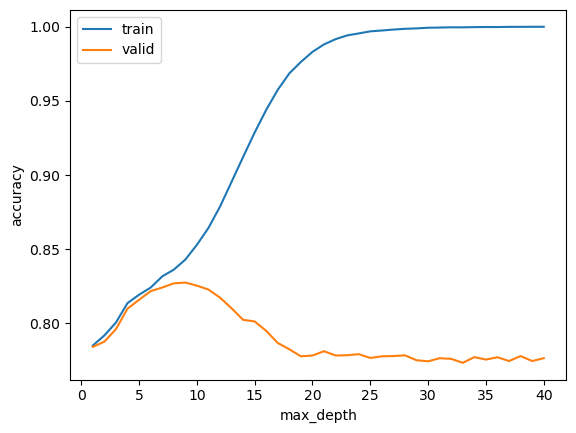

[Text(0.5, 0.75, 'x[10] <= 11.5\ngini = 0.497\nsamples = 51423\nvalue = [23823, 27600]'),
 Text(0.25, 0.25, 'gini = 0.338\nsamples = 22463\nvalue = [17618, 4845]'),
 Text(0.75, 0.25, 'gini = 0.337\nsamples = 28960\nvalue = [6205, 22755]')]

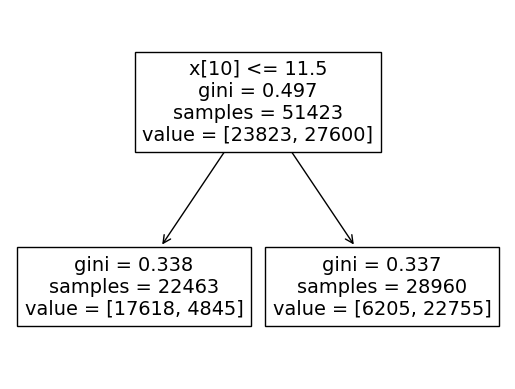

In [5]:
# fit_decision_tree(train, test, valid):
X_train, y_train = split_X_y(train)
X_valid, y_valid = split_X_y(valid)
X_test, y_test = split_X_y(test)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
max_depth = clf.get_depth()

models = []
accs_train = []
accs_valid = []

depths = range(1, max_depth + 1)

for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    models.append(clf)
    
    accs_train.append(clf.score(X_train, y_train))
    accs_valid.append(clf.score(X_valid, y_valid))

plt.plot(depths, accs_train, label="train")
plt.plot(depths, accs_valid, label="valid")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()



clf = models[0]
tree.plot_tree(clf)



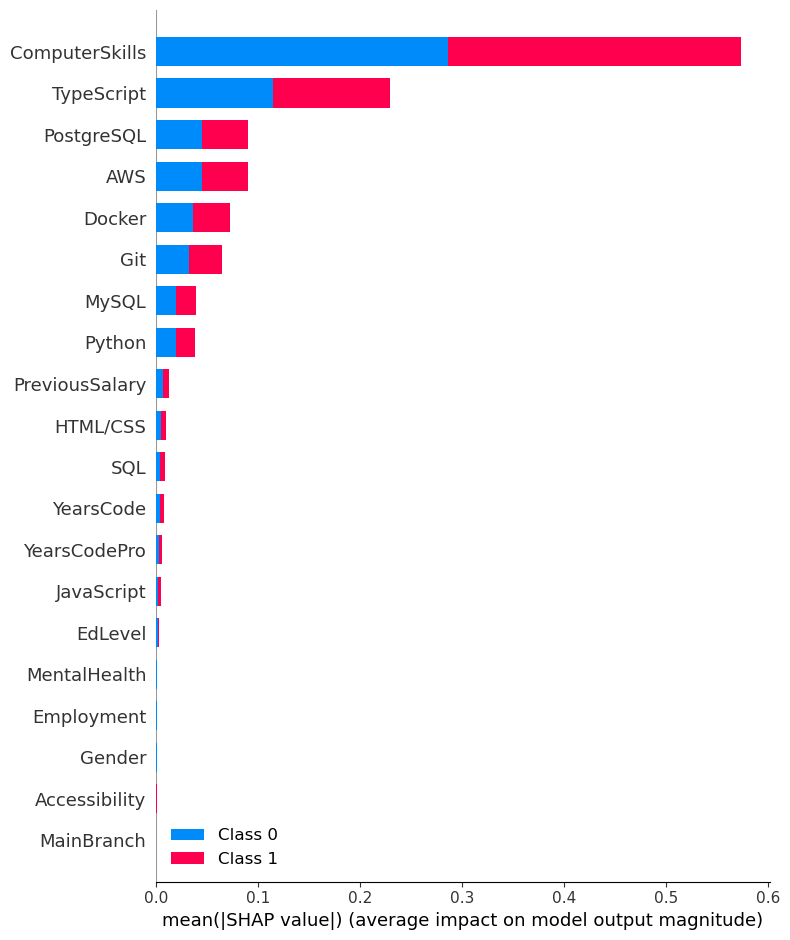

In [6]:
# Selecting the best model based on validation accuracy
best_index = accs_valid.index(max(accs_valid))
best_model = models[best_index]
# Create a SHAP TreeExplainer using the best model
explainer = shap.Explainer(best_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualization: Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
# shap.summary_plot(shap_values, X_test)




In [11]:
# Optional: Detailed SHAP value plot for the first instance in the test set
shap.initjs()  # Initialize JavaScript visualization in Jupyter Notebook (if using)
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0,:])